#**Amazon Sales Analysis Project**


In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset

df = pd.read_csv('/content/Amazon Sale DataSet.csv')

In [3]:
#View first 5 rows
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [4]:
#Vies last 5 rows
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


In [5]:
#Get summary of data type and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

###**Data Cleaning**

In [6]:
#Drop unnecessary columns
df.drop(['New', 'PendingS'], axis=1, inplace = True)

In [8]:
#Check for missing values and drop rows with missing values
df.isnull().sum()
df.dropna(inplace=True)

In [12]:
df.head(2)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship


In [16]:
#Convert the datatype where it required
df['Date'] = pd.to_datetime(df['Date'])
df['ship-postal-code'] = df['ship-postal-code'].astype(int)


In [23]:
#Rename columns name for better understanding
df.rename(columns={'Qty' : 'Quantity', 'ship-postal-code': 'Postal_code'}, inplace=True)

In [24]:
df.head(2)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,ship-city,ship-state,Postal_code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship


##**Exploratory Data Analysis (EDA)**
###**Descriptive Statistics**

In [26]:
#Display descriptive statistics
df.describe(include = 'number')

,index,Quantity,Amount,Postal_code
count,37514.000000,37514.000000,37514.000000,37514.000000
mean,60953.809858,0.867383,646.553960,463291.552754
std,36844.853039,0.354160,279.952414,194550.425637
min,0.000000,0.000000,0.000000,110001.000000
25%,27235.250000,1.000000,458.000000,370465.000000
50%,63470.500000,1.000000,629.000000,500019.000000
75%,91790.750000,1.000000,771.000000,600042.000000
max,128891.000000,5.000000,5495.000000,989898.000000


###**Categorical Data Analysis**

In [29]:
#View unique values in categorical columns
df.nunique()

,0
index,37464
Order ID,34664
Date,91
Status,11
Fulfilment,1
Sales Channel,1
ship-service-level,1
Category,8
Size,11
Courier Status,3


In [33]:
for col in df.select_dtypes(include = ['object']):
  print(col)
  print(df[col].unique())


Order ID
['405-8078784-5731545' '171-9198151-1101146' '403-9615377-8133951' ...
 '405-6493630-8542756' '407-0116398-1810752' '403-0317423-9322704']
Status
['Cancelled' 'Shipped - Delivered to Buyer' 'Shipped - Returned to Seller'
 'Shipped - Rejected by Buyer' 'Shipped - Lost in Transit'
 'Shipped - Out for Delivery' 'Shipped - Returning to Seller'
 'Shipped - Picked Up' 'Pending' 'Pending - Waiting for Pick Up'
 'Shipped - Damaged']
Fulfilment
['Merchant']
Sales Channel
['Amazon.in']
ship-service-level
['Standard']
Category
['T-shirt' 'Shirt' 'Blazzer' 'Socks' 'Trousers' 'Wallet' 'Perfume' 'Shoes']
Size
['S' '3XL' 'L' 'XS' '6XL' 'XXL' 'M' 'XL' 'Free' '5XL' '4XL']
Courier Status
['On the Way' 'Shipped' 'Unshipped']
currency
['INR']
ship-city
['MUMBAI' 'BENGALURU' 'PUDUCHERRY' ... 'tirupati' 'badlapur'
 'VARANASIVaranasi']
ship-state
['MAHARASHTRA' 'KARNATAKA' 'PUDUCHERRY' 'TELANGANA' 'ANDHRA PRADESH'
 'HARYANA' 'JHARKHAND' 'CHHATTISGARH' 'ODISHA' 'UTTAR PRADESH'
 'TAMIL NADU' 'UTTARAKH

##**Data Visualization**

**Size Distribution**

<ipython-input-35-1c81d63f2ddb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Size', data = df, palette = 'viridis')


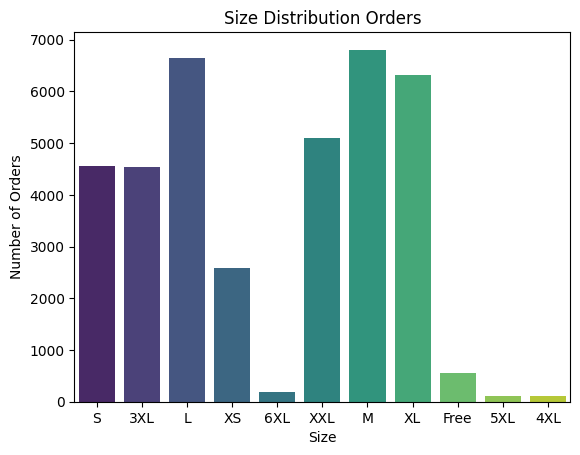

In [35]:
#Use vibrant colour palette  for count plot
sns.countplot(x = 'Size', data = df, palette = 'viridis')
plt.title('Size Distribution Orders')
plt.xlabel('Size')
plt.ylabel('Number of Orders')
plt.show()

###**Quantity by Size**

<ipython-input-38-0c8a0cb30e4e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Size', y = 'Quantity', data = size_qty_sum, palette = 'magma')


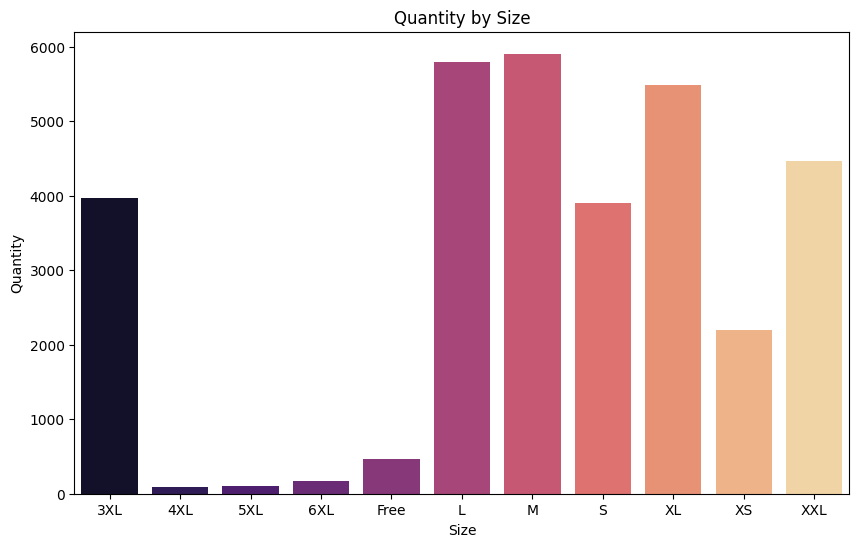

In [38]:
#Bar plot with "magma" color palette
size_qty_sum = df.groupby('Size')['Quantity'].sum().reset_index()
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Size', y = 'Quantity', data = size_qty_sum, palette = 'magma')
plt.title('Quantity by Size')
plt.xlabel('Size')
plt.ylabel('Quantity')
plt.show()

###**Courier Status Distribution**

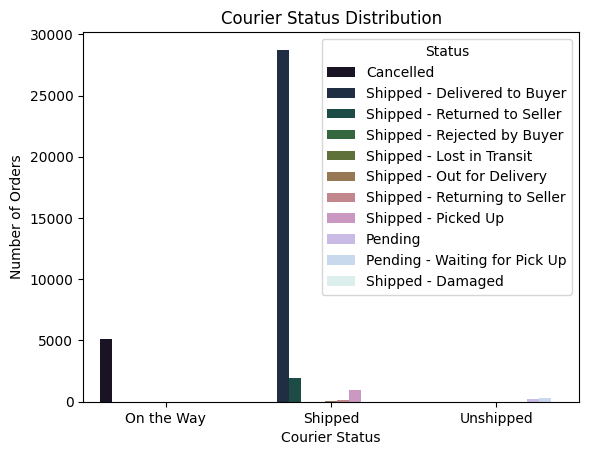

In [41]:
#Countplot with "cubehelix" color palette
sns.countplot(x = 'Courier Status', data = df, hue = 'Status', palette = 'cubehelix')
plt.title('Courier Status Distribution')
plt.xlabel('Courier Status')
plt.ylabel('Number of Orders')
plt.show()

##**Category Distribution**

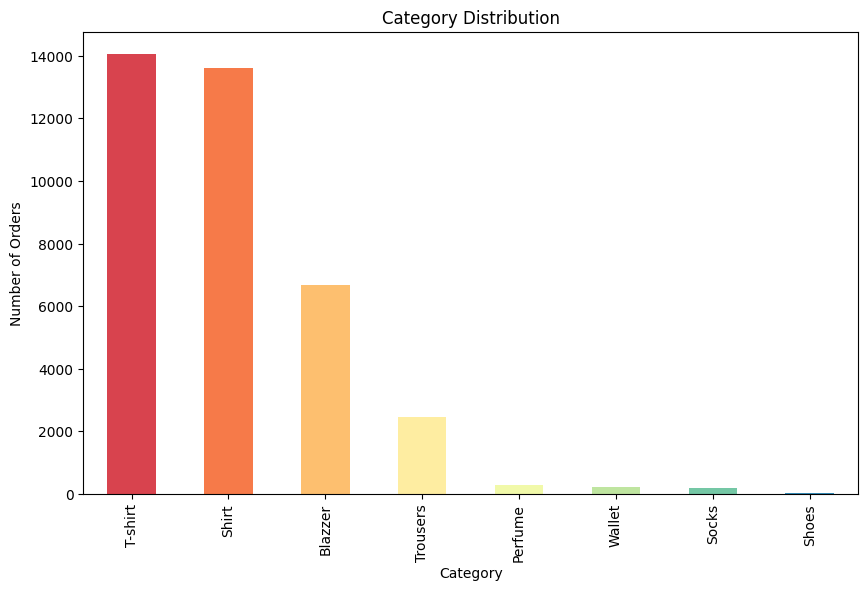

In [43]:
#Barplot use a "spectral" color palette
plt.figure(figsize = (10, 6))
df['Category'].value_counts().plot(kind = 'bar', color = sns.color_palette('Spectral', len(df['Category'].unique())))
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.show()

##**B2B Vs Retail Orders**

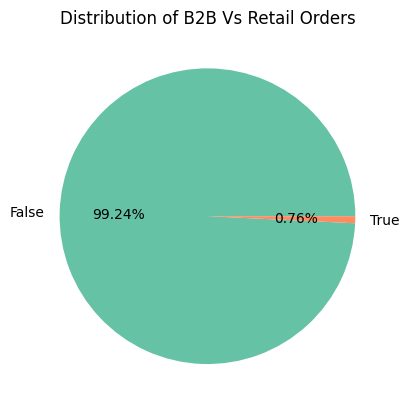

In [48]:
#PieChart with custom columns
b2b_retail = df['B2B'].value_counts()
plt.pie(b2b_retail, labels = b2b_retail.index, autopct = '%1.2f%%', colors = sns.color_palette('Set2'))
plt.title('Distribution of B2B Vs Retail Orders')
plt.show()

###**Fulfillment Method"**

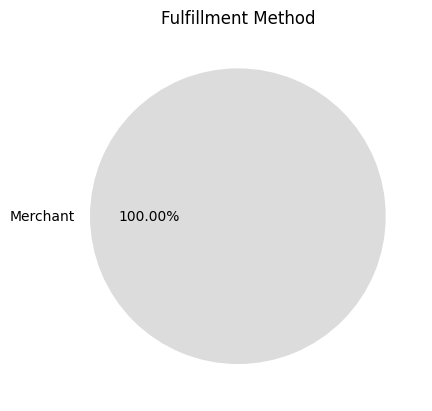

In [53]:
#PieChart with "coolwarm" colors
fulfillment_method = df['Fulfilment'].value_counts()
plt.pie(fulfillment_method, labels = fulfillment_method.index, autopct = '%1.2f%%', colors = sns.color_palette('coolwarm', len(fulfillment_method)))
plt.title('Fulfillment Method')
plt.show()

**Customer Segmentation**

In [55]:
#Check the few rows of the data and list the column names
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'Postal_code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

###**Create Purchase Frequency and Average Order Values for Each Category**

In [97]:
#Calculate purchase frequency by counting the number of orders per Category
df['Purchase_frequency'] = df.groupby('Category')['Order ID'].transform('count')
df['Purchase_frequency']

,Purchase_frequency
0,14062
1,13595
3,6661
7,13595
12,13595
...,...
128875,14062
128876,6661
128888,2459
128891,228


In [78]:
#Calculate the average order value for each category
df['Average Order Value'] = df.groupby('Category')['Amount'].transform('mean')

#Create segmentation based on average order value (e.g: 'High', 'Medium','Low' based on quantiles or threshold)
df['Customer Segment'] = pd.cut(df['Average Order Value'],
                                bins=[-float('inf'),  #Lowest
                                      df['Average Order Value'].quantile(0.33),
                                      df['Average Order Value'].quantile(0.66),
                                      float('inf')],  #Highest
                                labels=['Low', 'Medium', 'High'])



###**Verify New column**

In [98]:
df[['Category', 'Average Order Value', 'Customer Segment','Purchase_frequency']].head(10)

,Category,Average Order Value,Customer Segment,Purchase_frequency
0,T-shirt,822.372824,Medium,14062
1,Shirt,450.287097,Low,13595
3,Blazzer,741.678745,Medium,6661
7,Shirt,450.287097,Low,13595
12,Shirt,450.287097,Low,13595
14,T-shirt,822.372824,Medium,14062
15,Shirt,450.287097,Low,13595
18,Shirt,450.287097,Low,13595
23,T-shirt,822.372824,Medium,14062
25,T-shirt,822.372824,Medium,14062


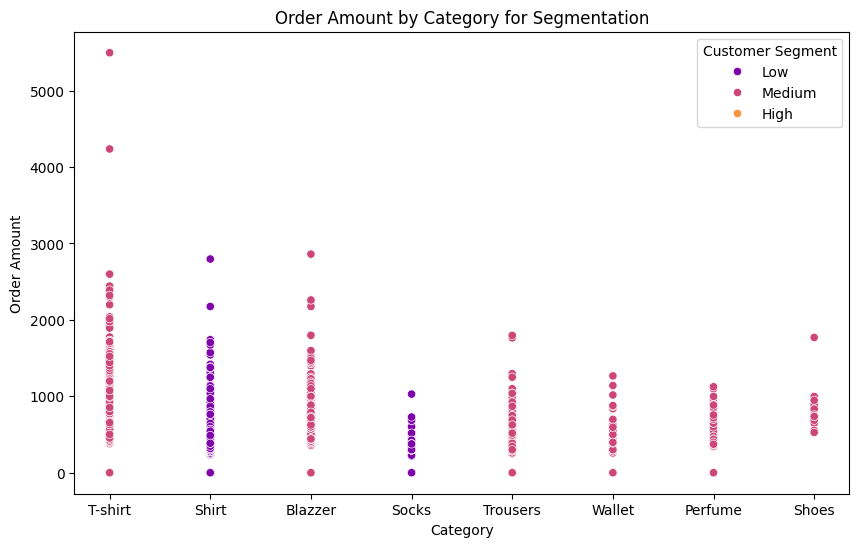

In [104]:
#Assuming 'Category' represents customer segmentation and 'Amount' is the value for each order

#ScatterPlot to show order amount by category for segmentation
plt.figure(figsize = (10, 6))
sns.scatterplot(x='Category', y='Amount', data=df, hue = 'Customer Segment', palette='plasma')
plt.title('Order Amount by Category for Segmentation')
plt.xlabel('Category')
plt.ylabel('Order Amount')
plt.show()

###**Sales Performance by Category**

<ipython-input-108-213bfc6c37b0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Category', y = 'Amount', data = df, palette = 'viridis')


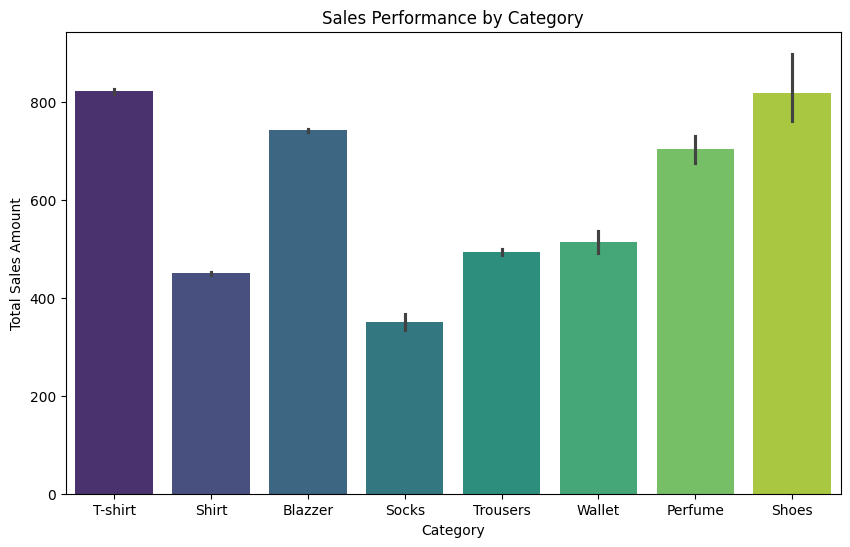

In [108]:
#BarPlot to visualize sales performance by Categorgy
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Category', y = 'Amount', data = df, palette = 'viridis')
plt.title('Sales Performance by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales Amount')
plt.show()

###**Sales Channel Analysis**

<ipython-input-109-144ea5b93111>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Sales Channel', y = 'Amount', data = df, palette = 'magma')


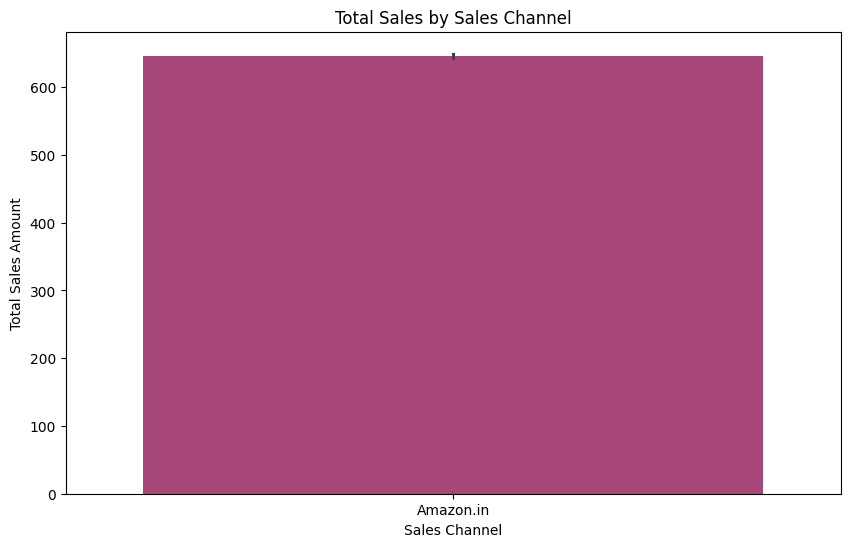

In [109]:
#BarPlot to visualize total sales by sales channel
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Sales Channel', y = 'Amount', data = df, palette = 'magma')
plt.title('Total Sales by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Sales Amount')
plt.show()

###**Customer Segment Analysis**

<ipython-input-110-9df1a22b8632>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Customer Segment', y = 'Amount', data = df, palette = 'cubehelix')


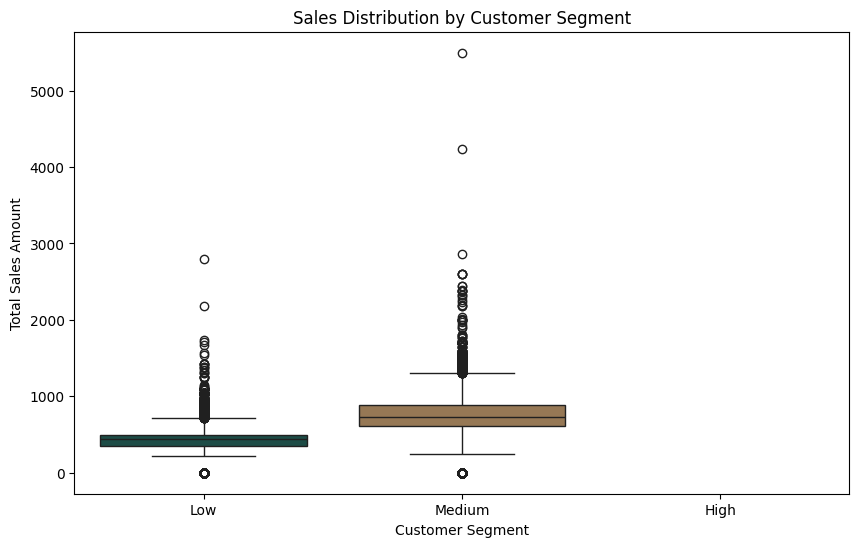

In [110]:
#BoxPlot to visualize sales distribution by customer segment
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Customer Segment', y = 'Amount', data = df, palette = 'cubehelix')
plt.title('Sales Distribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales Amount')
plt.show()

###**Order Quantity Analysis**

<ipython-input-111-24ceebf06a4b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Category', y = 'Quantity', data = df, palette = 'viridis')


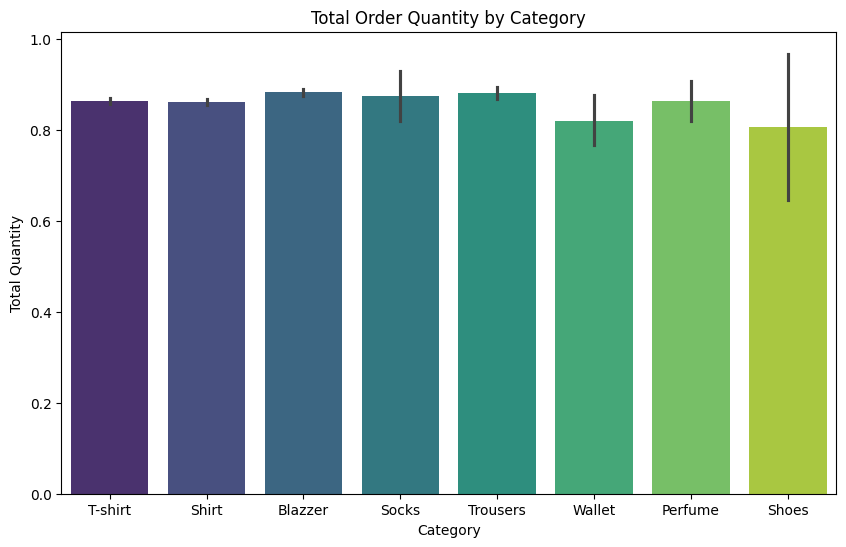

In [111]:
#BarPlot to visualize total order quantity by categogry
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Category', y = 'Quantity', data = df, palette = 'viridis')
plt.title('Total Order Quantity by Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity')
plt.show()

###**Purchase Frequency Vs. Average Order Value**

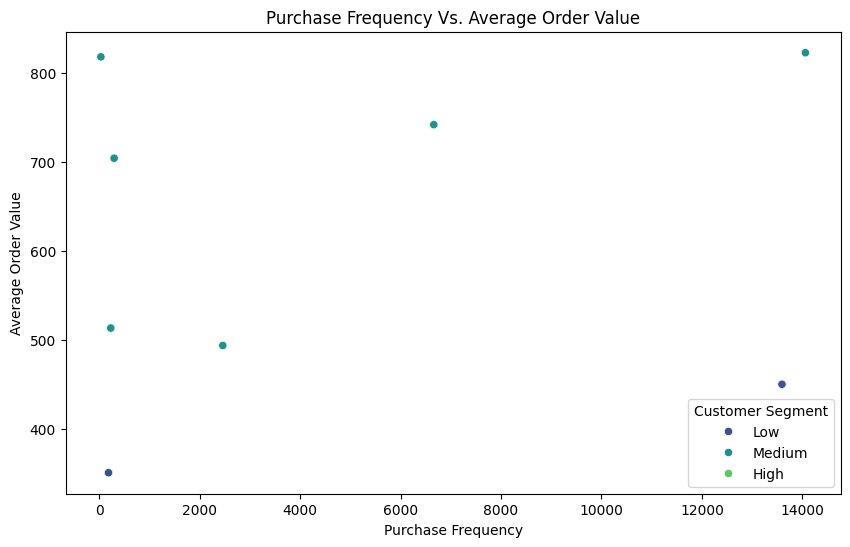

In [118]:
#ScatterPlot for purchase frequency vs. Average order value
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Purchase_frequency', y = 'Average Order Value', data = df, hue = 'Customer Segment', palette = 'viridis')
plt.title('Purchase Frequency Vs. Average Order Value')
plt.xlabel('Purchase Frequency')
plt.ylabel('Average Order Value')
plt.legend(title = 'Customer Segment')
plt.show()

##**Conclusion**

In this analysis, we explored various dimensions of the sales data, leveraging visualization to gain insights into key performance indicators. Here are some key takeaways based on the visualizations we generated:


1.   **Sales Performance by Category:** The bar plot of the sales performance by category highlighted which categories contributes the most to overall sales. This insight can guide inventory management and marketing strategies.

2.   **Sales Channel Analysis:** Analyzing total sales by sales channel and revealed the effectiveness of different sales channel. Understanding which channels yield the most highest sales can help to optimize the resource allocation and enhance sales strategies.

3.  **Customer Segment Analysis:** The box plot of the sales distribution by customer segment provide the insights about how different segments perform financially. Identifying high-performing segments that can aid in targeted marketing efforts and customer relationship management.

4.  **Purchase Frequency Vs. Average Order Value:** The scatter plot illustrating the relation between purchase frequency and average order value revealed trends in customer purchasing behaviour. Identifying segments with high purchase frequency but low average order value can present opportunities for upselling or cross-selling.

###**Final Thoughts**

The visualizations provide a comprehensive overview of the sales data, allowing for a deeper understanding of customer behavior, product performance, and overall sales strategies. By utilizing these insights, business people can make informed decisions, enhance operational efficiency, and ultimately drive growth.

For further analysis, consider exploring additional metrics, such as customer retention rates, seasonal trends, or the impact of marketing campaigns on sales performance. Continuous data monitoring and analysis will help adapt strategies to meet changing market demands and improve business outcomes.


